In [1]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

DataFileDataFile = "F:\\Projects\\Git\\TSP\\data\\1711.csv"
df = read_csv(DataFileDataFile, names=['date', 'crossid', 'count'])
df275 = df[df['crossid']==275].sort_values(by='date')
df275['date'] = pd.to_datetime(df275['date'])
df275 = df275[['date','count']]
df275 = df275.set_index('date')
dataset = df275['count'].values.astype('float32')
plt.plot(df275)
plt.show()

D:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


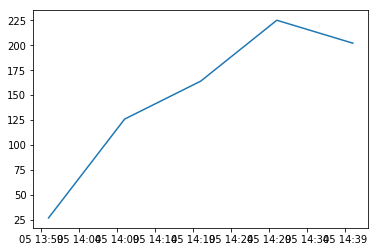

In [2]:
plt.plot(df275[0:5])
plt.show()

In [3]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=6 * 24)
    rolstd = pd.rolling_std(timeseries, window=6* 24)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

D:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=144,center=False).mean()
  """
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=144,center=False).std()
  


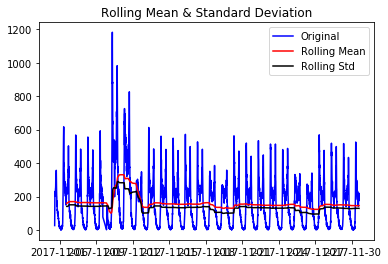

Results of Dickey-Fuller Test:
Test Statistic                -9.246559e+00
p-value                        1.531834e-15
#Lags Used                     1.800000e+01
Number of Observations Used    3.538000e+03
Critical Value (1%)           -3.432200e+00
Critical Value (5%)           -2.862357e+00
Critical Value (10%)          -2.567205e+00
dtype: float64


In [4]:
test_stationarity(df275['count'])

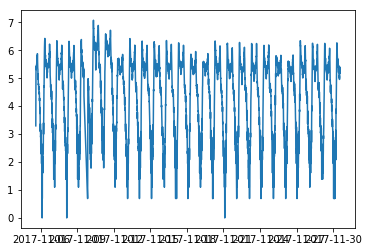

In [5]:
dataset = df275['count'].values.astype('float32')
log_dataset = np.log(df275)
log_dataset
plt.plot(log_dataset)
plt.show()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=144,center=False).mean()
  """Entry point for launching an IPython kernel.


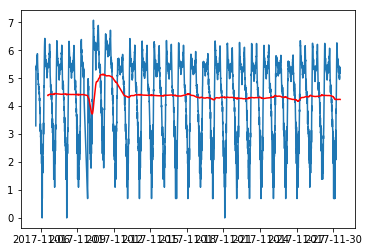

In [6]:
moving_avg = pd.rolling_mean(log_dataset,window=24 * 6)
plt.plot(log_dataset)
plt.plot(moving_avg, color='red')
plt.show()

In [7]:
log_dataset_moving_avg_diff = log_dataset - moving_avg
log_dataset_moving_avg_diff

,count
date,
2017-11-05 14:00:00,NaN
2017-11-05 14:10:00,NaN
2017-11-05 14:20:00,NaN
2017-11-05 14:30:00,NaN
2017-11-05 14:40:00,NaN
2017-11-05 14:50:00,NaN
2017-11-05 15:00:00,NaN
2017-11-05 15:10:00,NaN
2017-11-05 15:20:00,NaN


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=144,center=False).mean()
  """
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=144,center=False).std()
  


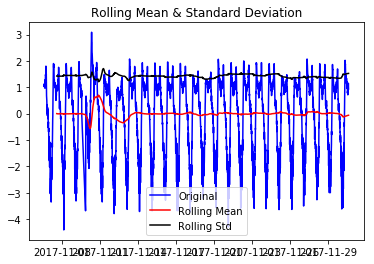

Results of Dickey-Fuller Test:
Test Statistic                -9.074281e+00
p-value                        4.220231e-15
#Lags Used                     3.000000e+01
Number of Observations Used    3.383000e+03
Critical Value (1%)           -3.432284e+00
Critical Value (5%)           -2.862395e+00
Critical Value (10%)          -2.567225e+00
dtype: float64


In [8]:
log_dataset_moving_avg_diff = log_dataset_moving_avg_diff.dropna()

test_stationarity(log_dataset_moving_avg_diff['count'])

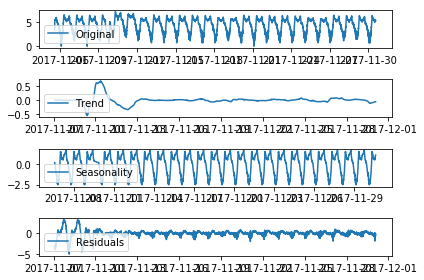

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(log_dataset_moving_avg_diff, freq = 6 * 24)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(log_dataset, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=144,center=False).mean()
  """
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=144,center=False).std()
  


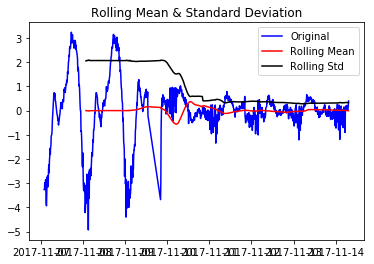

Results of Dickey-Fuller Test:
Test Statistic                -6.530322e+00
p-value                        9.907180e-09
#Lags Used                     2.100000e+01
Number of Observations Used    9.780000e+02
Critical Value (1%)           -3.437054e+00
Critical Value (5%)           -2.864500e+00
Critical Value (10%)          -2.568346e+00
dtype: float64


In [10]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose['count'][0:1000])


### ACP and PACF

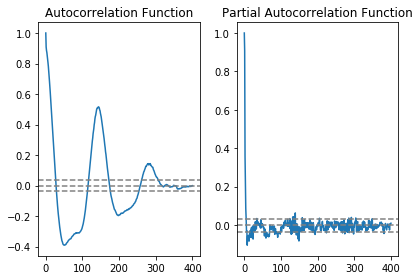

In [11]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(residual, nlags=400)
lag_pacf = pacf(residual, nlags=400, method='ols')
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(residual)), linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(residual)), linestyle='--',color='gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(residual)), linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(residual)), linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

In [12]:
a=1.96/np.sqrt(len(residual))            
a

0.03427537342235078

In [13]:
p=29
q=5

In [14]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA?

In [ ]:
model = ARIMA

D:\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
D:\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will 

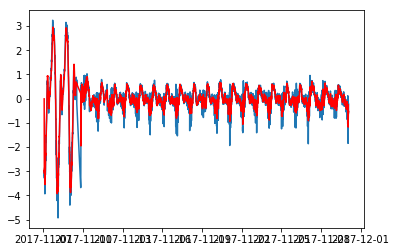

In [15]:
model = ARIMA(residual,order=(29,0,5))
result_1 = model.fit(disp=-1)
plt.plot(residual)
plt.plot(result_1.fittedvalues, color='red')
plt.show()

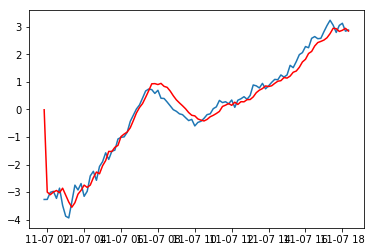

In [16]:
plt.plot(residual[0:100])
plt.plot(result_1.fittedvalues[0:100], color='red')
plt.show()

In [17]:
model2 = ARIMA(residual,order=(300,0,5))
result_2 = model2.fit(disp=-1)
plt.plot(residual)
plt.plot(result_2.fittedvalues, color='red')
plt.show()

D:\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


MemoryError: 

In [ ]:
result_2 = model2.fit(disp=-1)
